# Modelo de Presa Depredador


 El estudio de modelos matemáticos para predecir la dinámica de una población de especies competentes tiene su origen en los trabajos independientes publicados en la primera época del siglo xx por A. J. Lotka y V. Volterra \\
Considere el problema de predecir la población de dos especies, una de las cuales es un depredador, cuya población en el tiempo $t$ es $x_2(t)$, que se alimenta de la otra, que es la presa, cuya población es $x_1(t)$. Supondremos que la presa siempre tiene un suministro de comida adecuado y que su índice de natalidad en cualquier tiempo es proporcional al número de presas vivas en ese momento; es decir, el índice de natalidad (presa) es $k_1x_1(t)$. El índice de mortalidad de la presa depende tanto del número de presas como de depredadores vivos en ese momento. Para simplicidad, suponemos un índice de mortalidad (presa) $=k_2x_1(t)x_2(t)$. El índice de natalidad del depredador, por otro lado, depende de su suministro de comida, $x_1(t)$, así como del número de depredadores disponible para propósitos de reproducción. Por esta razón, suponemos que el índice de natalidad (depredador) es $k_3x_1(t)x_2(t)$. El índice de mortalidad del depredador será tomado como simplemente proporcional al número de depredadores vivos en ese momento; es decir, el índice de mortalidad (depredador) $= k_4x_2(t)$.\\
Puesto que $x_1(t)$ y $x_2(t)$ representan el cambio en las poblaciones de presas y depredadores, respectivamente, en relación con el tiempo, el problema se expresa mediante el sistema de ecuaciones diferenciales no lineales



$$x'_1(t) = k_1x_1(t) - k_2x_1(t)x_2(t) $$
$$x'_2(t) = k_3x_1(t)x_2(t) - k_4x_2(t)$$


Resuelva este sistema para $0 \leqslant t \leqslant 4$, al suponer que la población inicial de la presa es 1000 y que la del depredador es 500 y que las constantes son $k_1 = 3$, $k_2 = 0.002$, $k_3 = 0.0006$, y $k_4
2.  = 0.5$. Bosqueje una gráfica de las soluciones para este problema, al graficar ambas poblaciones con el tiempo y describa el fenómeno físico repretable?





In [18]:
import numpy as np

def metodo_euler(ecuacion_diferencial, a, b, h, condicion_inicial):
    """
    Implementacion del metodo de Euler para resolver ecuaciones diferenciales de primer orden.

    Parametros:
        ecuacion_diferencial : funcion f(t, y) que representa la ecuacion diferencial
        condicion_inicial: valor inicial y(t0)
        a : limite inferior del intervalo
        b : limite superior del intervalo
        h : Espaciamiento para generar los valores de t 
        condicion_inicial: valor inicial y(t0)
        
    Retorna:
        tiempos (list): lista de tiempos t
        valores (list): lista de soluciones y(t)
    """

# Calcular número de pasos (convertido a entero)
    n = int((b - a) / h)

    valores = [condicion_inicial]
    
    for i in range(n):
        y = valores[i] + h * ecuacion_diferencial(a + i*h, valores[i])
        valores.append(y)

    return np.linspace(a,b, n + 1), valores

In [19]:
def lotka(t, y):

    """
    Y = es un arreglo y[0] = x1 y y[1] = x2, ..... y[n-1] = xn
    x1 = presas
    x2 = depredadores
    """
    x1 = y[0] # Presas
    x2 = y[1] # Depredadores
    k1 = 3 # Natalidad de las presas
    k2 = 0.002 # Mortalidad de las presas
    k3 = 0.0006 # Natalidad de los depredadores
    k4 = 0.5 #Mortalidad de los depredadores

    f1 = k1 * x1 - k2 * x1 * x2 # Ecuacion de las presas
    f2 = k3 * x1 * x2 - k4 * x2# Ecuacion de los depredadores

    return np.array([f1,f2])


In [20]:
tiempo, Modelo = metodo_euler(lotka, 0, 10, 0.0001, np.array([1000, 500]))

Text(0.5, 1.0, 'Presas y Depredadores vs Tiempo')

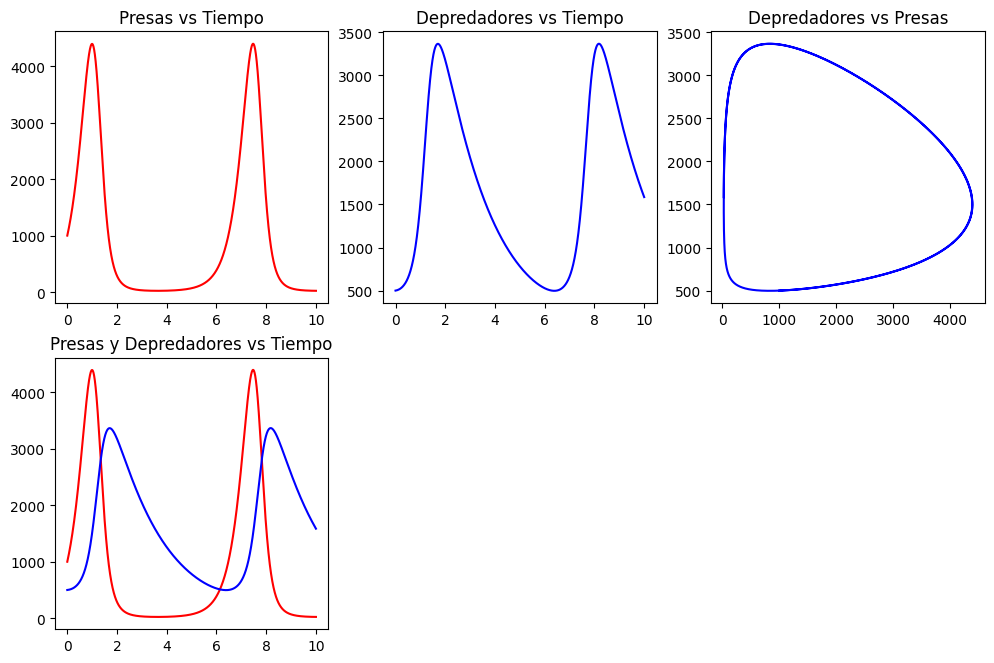

In [21]:
import matplotlib.pyplot as plt
Presas = np.array(Modelo)[:,0]
Depredadores = np.array(Modelo)[:,1]

plt.figure(figsize=(12,12), dpi = 100)
#Graficas Presas versus tiempo
plt.subplot(331)
plt.plot(tiempo, Presas, 'r', label = 'Presas vs Tiempo')
plt.title('Presas vs Tiempo')

#Graficas depredadores versus tiempo
plt.subplot(332)
plt.plot(tiempo, Depredadores, 'b', label = 'Depredadores vs Tiempo')
plt.title('Depredadores vs Tiempo')
#Graficas Presas versus depredadores
plt.subplot(333)
plt.plot(Presas, Depredadores, 'b', label = 'Presas vs Depredadores')
plt.title('Depredadores vs Presas')

# combinando presa y depredadores
plt.subplot(334)
plt.plot(tiempo, Presas, 'r', label = 'Presas vs Tiempo')
plt.plot(tiempo, Depredadores, 'b', label = 'Depredadores vs Tiempo')
plt.title('Presas y Depredadores vs Tiempo')


## Modelo epidemiológico

Supongamos que un corregimiento existe un pequeño grupo de personas, que tienen una enfermedad infecciosa, y a este corregimiento llega una población más grande. La situación que se desea plantear es saber si, cuando aumenta el tiempo, desaparecerá la enfermedad o por el contrario se presentará una epidemia. 
También supongamos que la enfermedad da inmunidad permanente a cualquier persona que se haya recuperado de la infección y además que su período o tiempo de incubación es muy corto. Por lo tanto, una persona que se contagie se convierte rápidamente en un agente de contagio. 
Dividamos la población en tres clases de personas:

1. La clase Infecciosa I: Esta  población es formada por todos aquellos individuos   o personas que están en condiciones de trasmitir la enfermedad.
   
2. La clase Susceptible S: Esta población es formada por todas aquellas personas que no son agentes de trasmitir la infección pero que están en condiciones de padecerla y ser infecciosos
3. La clase retirada R: Esta población está formada por loas personas que adquirieron la enfermedad y murieron, los que se han recuperado y son inmunes permanentemente  y los que fueron aislados hasta la recuperación y adquisición de inmunidad


Sea $S(t), I(t), R(t)$ al número de individuos que conforman la clase S, I, R
 en un tiempo determinado t. Sea el sistema de ecuaciones para modelar la epidemia de la población: 
 
 $$\frac{dS}{dt}= -aSI $$
   $$s(t_0)=S_0=254$$
$$\frac{dI}{dt}=aSI-bI $$  
$$ I(t_0)=I_0=7$$



y $R(t)=N-S(t)-I(t)$, donde $N$ es el número de población del corregimiento
el corregimiento
 Determine la solución del sistema de ecuaciones diferenciales con valores de $a=15$ y $b=2385$, que sucede con la población $I(t)$ y $S(t)$
ón $I(t)$ Realice las gráficas de $I(t)$, $S(t)$, $R(t)$, en función del tiempo e interprete 

In [22]:
def function ( t, y):
    a = 15
    b = 2385

    s0 = y[0]
    s1 = y[1]

    dsdt = -a * s0 * s1
    didt = a * s0 * s1 - b * s1

    return np.array([dsdt, didt])
    

[array([254,   7]), array([251.333 ,   7.9975]), array([248.3179465 ,   9.10514975]), array([244.92648837,  10.32502967]), array([241.13317848,  11.65581998]), array([236.9172711,  13.0918143]), array([232.26475572,  14.62193196]), array([227.17051654,  16.22884037]), array([221.64044546,  17.88833302]), array([215.69327832,  19.56913274]), array([209.36188272,  21.23329017]), array([202.69372031,  22.83731288]), array([195.75025045,  24.33408362]), array([188.60514601,  25.67550912]), array([181.34134629,  26.81569992]), array([174.0471536 ,  27.71434817]), array([166.81174848,  28.33988125]), array([159.72061076,  28.67195729]), array([152.85135697,  28.70294927]), array([146.27042985,  28.43822299]), array([140.0309232 ,  27.89521346]), array([134.17163446,  27.10149379]), array([128.71725688,  26.0921651 ]), array([123.67948901,  24.9069516 ]), array([119.05877044,  23.58736221]), array([114.84634692,  22.17419984]), array([111.02640815,  20.70559195]), array([107.5781069 ,  19.215

Text(0.5, 1.0, 'Infectados vs Tiempo')

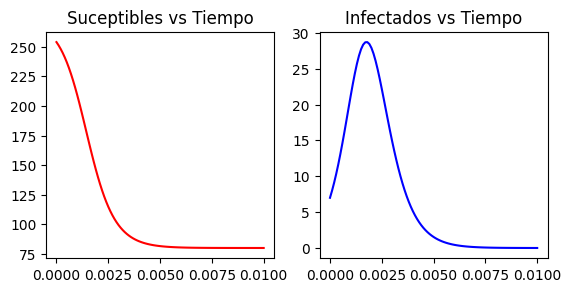

In [23]:
tiempo , modelo = metodo_euler(function, 0, 0.01, 0.0001, np.array([254, 7]))
print(modelo)
suceptibles = np.array(modelo)[:,0]
infectados = np.array(modelo)[:,1]

plt.figure(figsize=[10,10])
#Graficas suceptibles versus tiempo
plt.subplot(331)
plt.plot(tiempo, suceptibles, 'r', label = 'suceptibles vs Tiempo')
plt.title('Suceptibles vs Tiempo')

#Graficas depredadores versus tiempo
plt.subplot(332)
plt.plot(tiempo, infectados, 'b', label = 'Infectados vs Tiempo')
plt.title('Infectados vs Tiempo')
#Graficas Presas versus depredadores

 Supongamos que después de que Denise y Chad rompen su compromiso, Chad es reemplazadado por Craig en los sentimientos de Denise, pero su relación sigue en gran medida el mismo patrón que tuvieron Denise y Chad. Denise y Craig toman juntos una clase de Ingienería  donde se les asigna como compañeros de laboratorio. Tienen que completar una nueva práctica cada $2\pi c$ semanas, donde $c$ es una constante positiva. Supongamos que el impacto del afecto de Denise por Craig a partir de la experiencia de trabajar juntos agrega el término $\sin{ct}$ a la razón de cambio del cari\~no de ella al tiempo $t$.
 Por ejemplo, durante la última parte de cada práctica de laboratorio, la tensión que sufre Denise al intentar arreglárselas con la tardanza de Craig reduce su afecto hacia él. Sus emociones están descritas por:

 $$
     x'=y+\sin{ct}; \quad y'=-4x
 $$

 Estudie la solución para las emociones iniciales dadas por $x(0)=y(0)=0$, lo que significa que si ellos no fueran forzados a trabajar juntos, no tendría sentimientos entre si. Como cambia esta relación a medida que $c$ se aproxima a 2 y luego excede esto valor.
 
- Solucionar el sistema de ecuaciones diferenciales de primer orden por el m\'etodo de Euler para $c=0.5, \quad c=1.5, \quad c=2.2, \quad c=3$.
- Solucionar el sistema de ecuaciones por el método de Runge Kutta de orden 4 para valores de $c=0.5, \quad c=1.5,\quad c=2.2,\quad c=3$.
- Ilustre los sentimientos de Denise vs los sentimientos de Craig.
- Ilustre los sentimientos de Denise e interprete.
- Ilustre los sentimiento de Craig e interprete

In [27]:
import numpy as np

def function_trio(t, y, c_value):


    xo, yo = y[0], y[1]

    x_prima = yo + np.sin(c_value * t) 
    y_prima = -4 * xo

    return np.array([x_prima, y_prima])


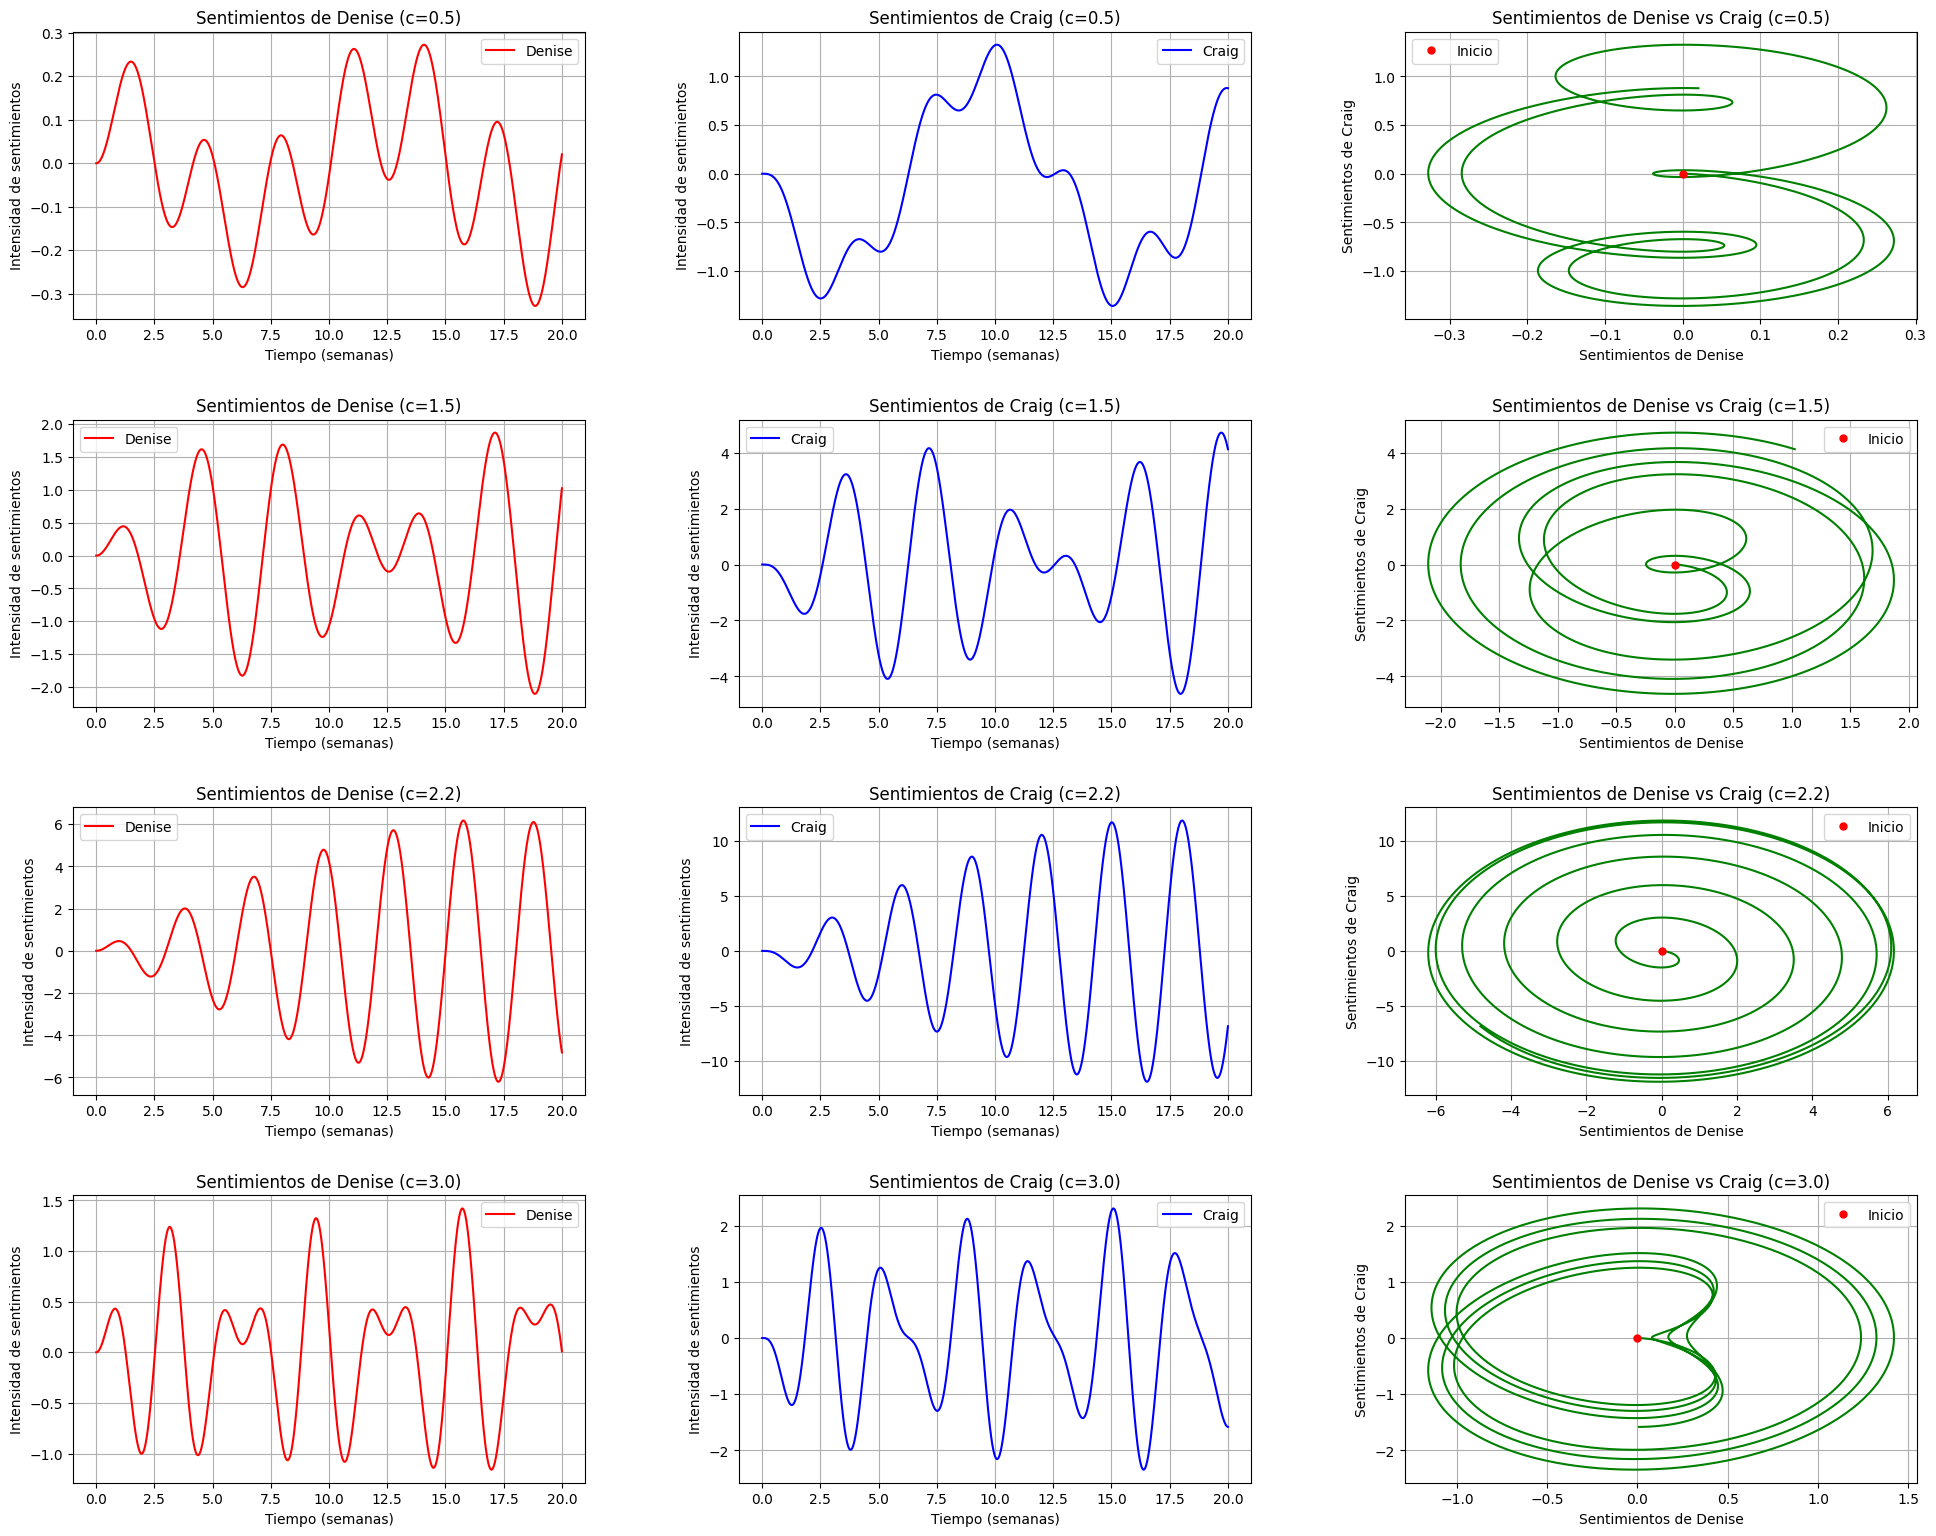

In [32]:
plt.figure(figsize=(20,16))
c_values = [0.5, 1.5, 2.2, 3.0]

for i, c in enumerate(c_values):

    a = 0
    b = 20
    h = 0.01
    
    tiempo, modelo = metodo_euler(lambda t, y: function_trio(t, y, c), a, b, h, np.array([0,0]))

    denise = np.array(modelo)[:,0]
    craig = np.array(modelo)[:,1]

    plt.subplot(4, 3, 3*i+1)
    plt.plot(tiempo, denise, 'r-', label='Denise')
    plt.title(f'Sentimientos de Denise (c={c})')
    plt.xlabel('Tiempo (semanas)')
    plt.ylabel('Intensidad de sentimientos')
    plt.grid(True)
    plt.legend()
    
    # Gráfica de los sentimientos de Craig
    plt.subplot(4, 3, 3*i+2)
    plt.plot(tiempo, craig, 'b-', label='Craig')
    plt.title(f'Sentimientos de Craig (c={c})')
    plt.xlabel('Tiempo (semanas)')
    plt.ylabel('Intensidad de sentimientos')
    plt.grid(True)
    plt.legend()
    
    # Gráfica de fase - Sentimientos de Denise vs Craig
    plt.subplot(4, 3, 3*i+3)
    plt.plot(denise, craig, 'g-')
    plt.title(f'Sentimientos de Denise vs Craig (c={c})')
    plt.xlabel('Sentimientos de Denise')
    plt.ylabel('Sentimientos de Craig')
    plt.grid(True)
    
    # Añadir punto inicial
    plt.plot(0, 0, 'ro', markersize=5, label='Inicio')
    plt.legend()

plt.tight_layout(pad = 3.0)
plt.subplots_adjust(hspace=0.35, wspace=0.3)
plt.show()


#Ejemplo 1

El sistema de ecuaciones diferenciales $x'=y-cx$, $y'=-2x$ es un modelo para Denise y Chad con condiciones iniciales $x(0)=0 \quad y(0)=2.5$ teniendo en cuenta la instromisión de los padres. Es  posible elegir la constante $c$ de tal modo que Denise y Chad con el tiempo no tengan ningínn sentimiento entre ellos, pero que se relaciones  de tal manera que se gusten hasta el final?

  
1. Solucionar el sistema de ecuaciones diferenciales con el método de Euler
3.  Ilustre los sentimientos de Denise e interprete
4. Ilustre los sentimiento de Chad e interprete


#Ejemplo 2

Usando el método de Euler hallar una aproximación al sistema de ecuaciones diferenciales ordinarias
\begin{eqnarray*}
u_1' &=& u_2-u_3+t\\
u_2' &=& 3t^2\\
u_3' &=& u_2+e^{-t}
\end{eqnarray*}
con valores iniciales $u_1(0)=1$, $u_2(0)=1$, $u_3(0)=-1$, $h=0.5$ y $0\leq t \leq 1$.